# Magnet testing     

In [1]:
import sys
import os
sys.path.append('../')

import pandas as pd
import src.io as sio

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

In [2]:
MAGNET_FOLDER1 = sio.get_qudi_data_path("2021\\03\\20210319\\Magnet\\")
MAGNET_FOLDER2 = sio.get_qudi_data_path("2021\\03\\20210322\\Magnet\\")
MAGNET_FOLDER3 = sio.get_qudi_data_path("2021\\03\\20210323\\Magnet\\")
MAGNET_FOLDER4 = sio.get_qudi_data_path("2021\\03\\20210324\\Magnet\\")

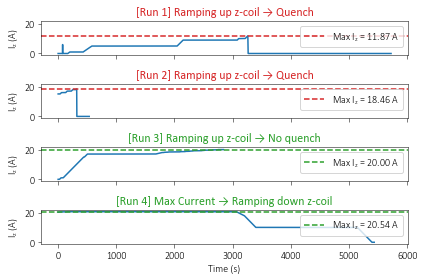

In [5]:
%matplotlib inline
files = os.listdir(MAGNET_FOLDER1)

dat_files = []

for file in files:
    filename, ext = os.path.splitext(file)
    if ext == ".dat":
        dat_files.append(filename + ext)
        
dat_files = [dat_value for idx, dat_value in enumerate(dat_files) if idx in [0, 2, 4, 5]]
        
fig, ax = plt.subplots(nrows=len(dat_files), sharex=True, sharey=True)

for idx, file in enumerate(dat_files):
    filepath = os.path.join(MAGNET_FOLDER1, file)
    df = pd.read_csv(filepath, skiprows=10, delimiter="\t", usecols=[0, 1, 2, 3], names=["Time", "current_x", "current_y", "current_z"])
    ax[idx].plot(df["Time"], df[f"current_z"], "-")
    
    if idx == 2:
        title = f"[Run {idx+1}] Ramping up z-coil → No quench"
        color = "tab:green"
    elif idx == 3:
        title = f"[Run {idx+1}] Max Current → Ramping down z-coil"
        color = "tab:green"
        ax[idx].set_xlabel("Time (s)")
    else:
        title = f"[Run {idx+1}] Ramping up z-coil → Quench"
        color = "tab:red"

    ax[idx].set_title(title, color=color)
    max_current = max(df[f"current_z"])
    ax[idx].axhline(max_current, linestyle="--", color=color, label="Max $I_z$" + f" = {max_current:.2f} A")
    ax[idx].legend(loc="upper right")
    ax[idx].set_ylabel("$I_z$ (A)")

fig.tight_layout()
plt.savefig("1.png", dpi=300)

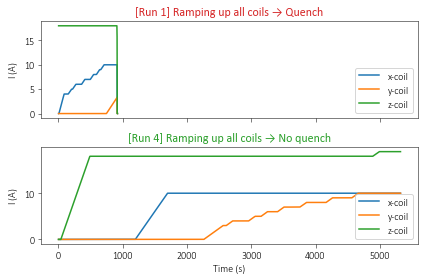

In [8]:
%matplotlib inline
files = os.listdir(MAGNET_FOLDER3)

dat_files = []

for file in files:
    filename, ext = os.path.splitext(file)
    if ext == ".dat":
        dat_files.append(filename + ext)
        
dat_files = [dat_value for idx, dat_value in enumerate(dat_files) if idx in [3, 4]]
        
fig, ax = plt.subplots(nrows=len(dat_files), sharex=True, sharey=False)

for idx, file in enumerate(dat_files):
    filepath = os.path.join(MAGNET_FOLDER3, file)
    df = pd.read_csv(filepath, skiprows=10, delimiter="\t", usecols=[0, 1, 2, 3], names=["Time", "current_x", "current_y", "current_z"])
    
    for axis in ["x", "y", "z"]:
        ax[idx].plot(df["Time"], df[f"current_{axis}"], "-", label=f"{axis}-coil")
    
    if idx == 1:
        title = f"[Run {idx+3}] Ramping up all coils → No quench"
        color = "tab:green"
        ax[idx].set_xlabel("Time (s)")
    elif idx == 3:
        title = f"[Run {idx+2}] Max Current → Ramping down"
        color = "tab:green"
        ax[idx].set_xlabel("Time (s)")
    else:
        title = f"[Run {idx+1}] Ramping up all coils → Quench"
        color = "tab:red"
        
    ax[idx].set_title(title, color=color)
    # max_current = max(df[f"current_z"])
    # ax[idx].axhline(max_current, linestyle="--", color=color, label="Max $I_z$" + f" = {max_current:.2f} A")
    ax[idx].legend(loc="lower right")
    ax[idx].set_ylabel("$I$ (A)")

fig.tight_layout()
plt.savefig("1.png", dpi=300)

In [128]:
def draw_ellipsoid(a, b, c):
    coefs = (a, b, c)  # Coefficients in a0/c x**2 + a1/c y**2 + a2/c z**2 = 1 
    # Radii corresponding to the coefficients:
    rx, ry, rz = coefs

    # Set of all spherical angles:
    u = np.linspace(0, 2 * np.pi, 20)
    v = np.linspace(0, np.pi, 20)

    # Cartesian coordinates that correspond to the spherical angles:
    # (this is the equation of an ellipsoid):
    x = rx * np.outer(np.cos(u), np.sin(v))
    y = ry * np.outer(np.sin(u), np.sin(v))
    z = rz * np.outer(np.ones_like(u), np.cos(v))
    
    return x, y, z

In [129]:
x, y, z = draw_ellipsoid(10, 10, 20)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_wireframe(x, y, z)

ax.set_zlabel("$I_z$ (A)")

ax.set_xlim([-20, 20])
ax.set_xlabel("$I_x$ (A)")

ax.set_ylim([-20, 20])
ax.set_ylabel("$I_y$ (A)")

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Text(0.5, 0, '$I_y$ (A)')

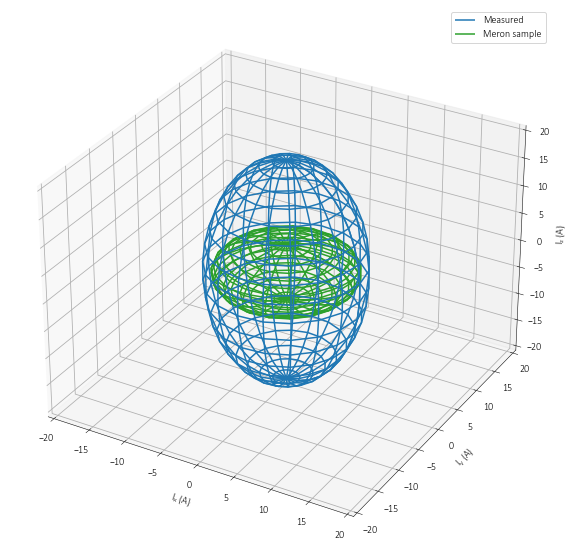

In [160]:
%matplotlib inline
x, y, z = draw_ellipsoid(10, 10, 20)
x1, y1, z1 = draw_ellipsoid(3, 3, 19)
x2, y2, z2 = draw_ellipsoid(9, 9, 5)

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.plot_wireframe(x, y, z, label="Measured", alpha=1)
#ax.plot_wireframe(x1, y1, z1, color="tab:orange", label="NV [111] tips", alpha=1)
ax.plot_wireframe(x2, y2, z2, color="tab:green", label="Meron sample", alpha=1)

ax.set_zlabel("$I_z$ (A)")

ax.set_xlim([-20, 20])
ax.set_xlabel("$I_x$ (A)")

ax.set_ylim([-20, 20])
ax.set_ylabel("$I_y$ (A)")

ax.legend()

#plt.savefig("Measured.png", dpi=300)